# Cohort Analysis

UCI Machine Learning Repository에서 제공하는 Online Retail 샘플 데이터를 활용한 Cohort 분석   

1. Retention 분석
2. Average Sold Quantity(평균 판매량) 분석
3. Average Sale Price(평균 판매액) 분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = None

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Column Description

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.   
**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.   
**Description**: Product (item) name. Nominal.   
**Quantity**: The quantities of each product (item) per transaction. Numeric.   
**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.   
**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.   
**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.   
**Country**: Country name. Nominal, the name of the country where each customer resides.   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 결측치 확인

In [5]:
# missing value 확인
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# missing value 제거
clean_df = df.dropna(subset=['CustomerID'])

In [7]:
clean_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Cohort 설정

**InvoiceDate**를 이용해서 Cohort를 분류.   
   
1. **InvoiceDate**에서 년/월 값 추출 = **[InvoiceMonth]**.   
2. **CustomerID** 당 가장 이른 **InvoiceMonth**가 최초 구매일 = **[Cohort]**.   
3. **CustomerID**의 각 구매월 **InvoiceMonth**에서 최초 구매일을 뺀 값 = **[Cohort_index]**   

In [9]:
import datetime as dt

In [10]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [11]:
clean_df['InvoiceMonth'] = clean_df['InvoiceDate'].apply(get_month)

<ipython-input-11-a1686fcd6592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['InvoiceMonth'] = clean_df['InvoiceDate'].apply(get_month)


In [12]:
clean_df['Cohort'] = clean_df.groupby('CustomerID')['InvoiceMonth'].transform('min')

<ipython-input-12-771a188675bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cohort'] = clean_df.groupby('CustomerID')['InvoiceMonth'].transform('min')


In [13]:
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [14]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month

    return year, month

In [15]:
invoice_year, invoice_month = get_date(clean_df, 'InvoiceMonth')

In [16]:
cohort_year, cohort_month = get_date(clean_df, 'Cohort')

In [17]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [18]:
clean_df['Cohort_index'] = year_diff*12 + month_diff +1

<ipython-input-18-cf3ea55f7f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cohort_index'] = year_diff*12 + month_diff +1


In [19]:
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort,Cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


# Plotting

## 1. Retention

In [20]:
cohort_data = clean_df.groupby(['Cohort', 'Cohort_index'])['CustomerID'].nunique().reset_index()

In [21]:
cohort_table = cohort_data.pivot_table(index='Cohort', columns='Cohort_index', values='CustomerID')

In [22]:
cohort_table

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cohort_size = cohort_table.iloc[:,0]

In [24]:
retention = cohort_table.divide(cohort_size, axis=0)
retention.round(3)

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2010-12-01,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02-01,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03-01,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04-01,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cohort Analysis (Retention Rate)')

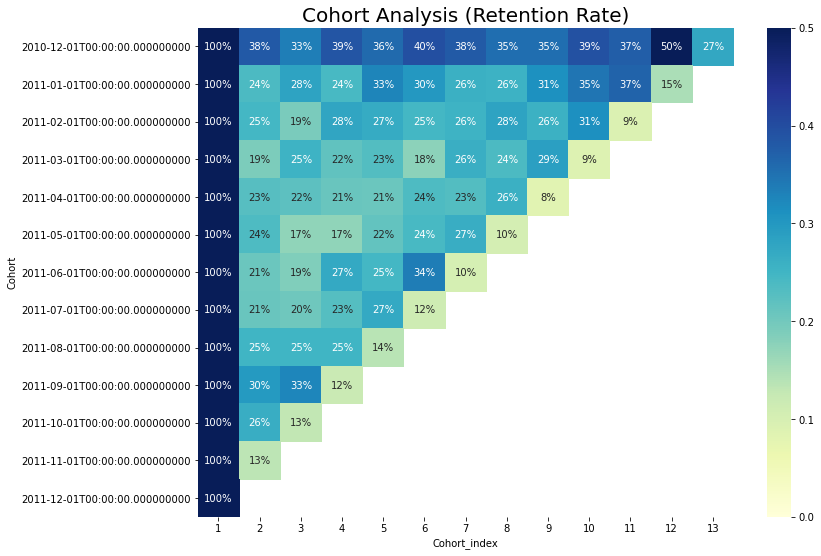

In [25]:
plt.figure(figsize=(12,9))
sns.heatmap(data=retention,
            annot = True,
            fmt = '.0%',
            vmin=0.0,
            vmax=0.5,
            cmap = 'YlGnBu')
plt.title('Cohort Analysis (Retention Rate)', size=20)

## 2. Average Sold Quantity

In [26]:
cohort_data2 = clean_df.groupby(['Cohort', 'Cohort_index'])['Quantity'].mean().reset_index()

In [27]:
cohort_table2 = cohort_data2.pivot_table(index='Cohort', columns='Cohort_index', values='Quantity').round(1)
cohort_table2

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cohort Analysis (Average Sold Quantity)')

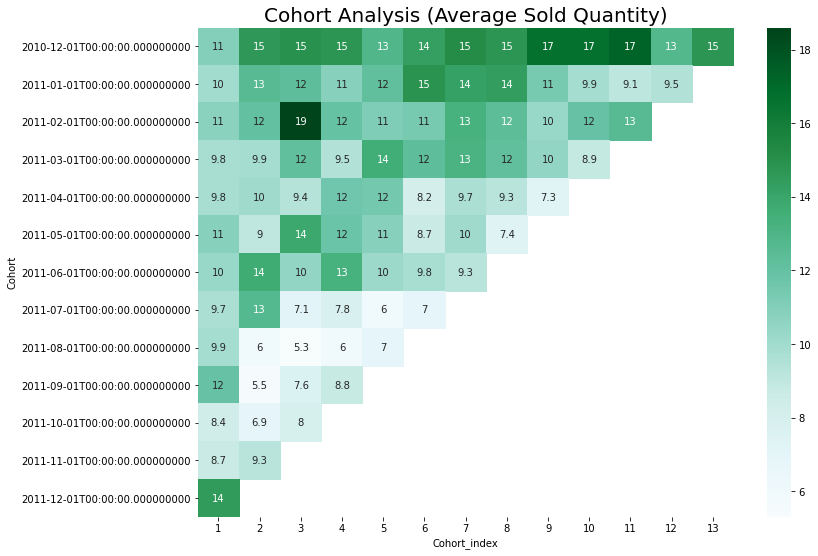

In [28]:
plt.figure(figsize=(12,9))
sns.heatmap(data=cohort_table2,
            annot = True,
            cmap = 'BuGn')
plt.title('Cohort Analysis (Average Sold Quantity)', size=20)

## 3. Average Sales

In [29]:
clean_df['Total_sale'] = clean_df['Quantity']*clean_df['UnitPrice']

<ipython-input-29-94dea9f5d3b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total_sale'] = clean_df['Quantity']*clean_df['UnitPrice']


In [30]:
cohort_data3 = clean_df.groupby(['Cohort', 'Cohort_index'])['Total_sale'].mean().reset_index()
cohort_table3 = cohort_data3.pivot_table(index='Cohort', columns='Cohort_index', values='Total_sale').round(2)
cohort_table3

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort,,,,,,,,,,,,,
2010-12-01,20.66,24.96,25.14,24.98,19.91,25.48,26.45,25.37,25.98,31.14,30.56,22.21,24.67
2011-01-01,18.44,23.48,20.27,17.51,21.53,25.40,24.38,24.53,18.72,20.14,18.67,18.40,NaN
2011-02-01,17.01,16.98,19.34,18.78,16.08,15.12,21.62,20.95,17.47,20.65,21.53,NaN,NaN
2011-03-01,17.03,17.85,21.49,16.96,19.20,18.05,21.67,17.29,15.44,11.42,NaN,NaN,NaN
2011-04-01,16.36,20.15,18.76,18.39,18.64,14.20,14.59,15.30,11.85,NaN,NaN,NaN,NaN
2011-05-01,19.03,15.73,21.21,19.44,17.80,14.05,16.14,13.25,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.37,14.50,18.95,19.78,14.99,15.88,12.74,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.11,21.19,11.38,12.42,10.51,11.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.10,11.89,11.51,14.36,15.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cohort Analysis (Average Sales Price)')

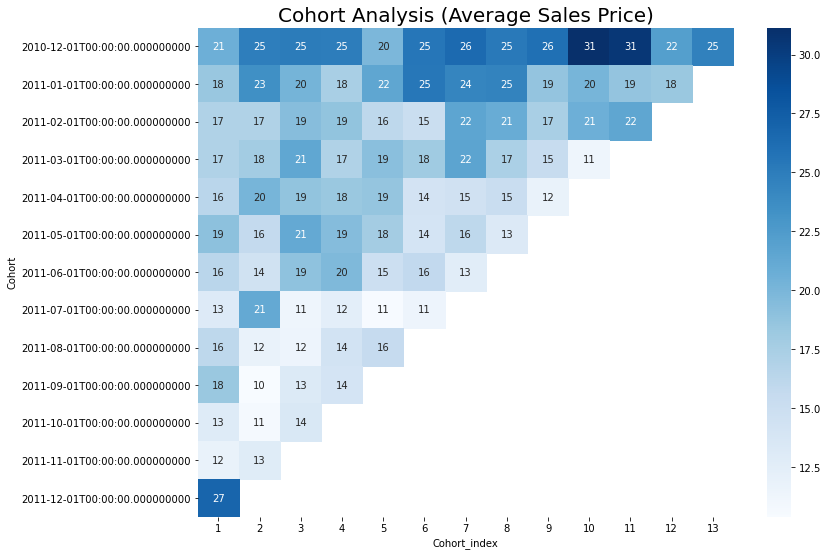

In [31]:
plt.figure(figsize=(12,9))
sns.heatmap(data=cohort_table3,
            annot = True,
            cmap = 'Blues')
plt.title('Cohort Analysis (Average Sales Price)', size=20)